In [ ]:
# spateo_dev env
import scanpy as sc
import numpy as np
import pandas as pd
import os
import sys
import glob
from anndata import AnnData
import seaborn as sns
from matplotlib.pyplot import rc_context
import matplotlib as mpl
import matplotlib.pyplot as plt
# import omicverse as ov
# ov.ov_plot_set()
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()


2024-10-11 16:41:54.884509: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# fig1 umap

#plot new umap

In [ ]:
adata=sc.read_h5ad("./data/fig1c.h5ad")

In [3]:
color_dist={
"Fibroblast":"#8b4a4b",
"SMC":'#1f78b4',
"Modulated_SMC":"#A1CFFA",
"Macrophage":'#df65b0',
"Tcell":'#ce1256',
"EC":'#238b45'
}

In [ ]:
adata

In [7]:
color_dist_timepoint={
"0":"#FFE3F0",
"2":'#EFA5B9',
"6":"#E4D7FF",
"10":'#ABA0FB',
"20_As":'#736DC2',
"20_Con":'#A1CFFA' 
}

/home/hemingmin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/hemingmin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/hemingmin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


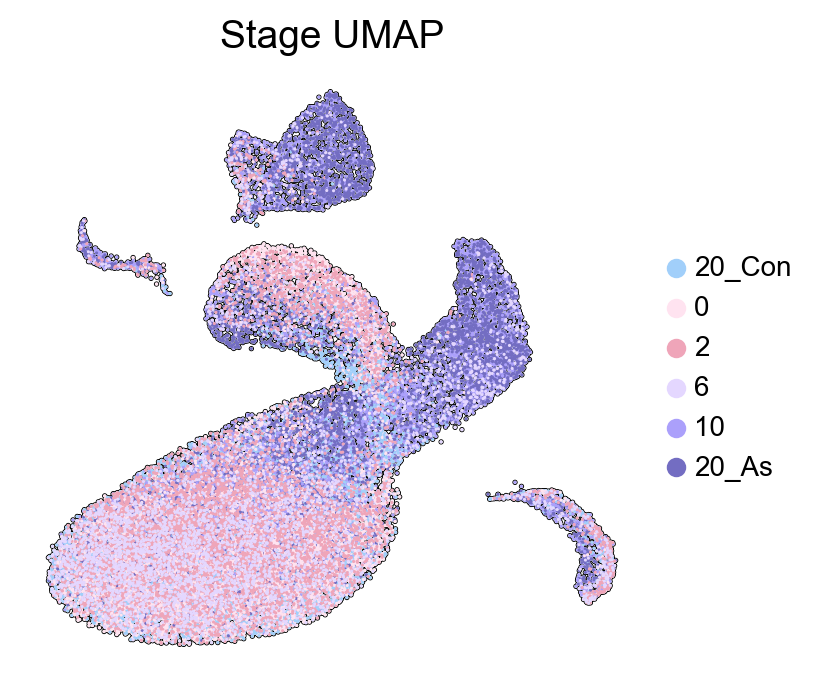

In [84]:
fig, ax = plt.subplots(figsize=(4, 4))

# with plt.rc_context({'axes.facecolor':'white','figure.figsize': [4, 4]}):
sc.pl.umap(adata, color=['timepoint_2'], size=5,
             alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
           cmap="Purples",
           legend_loc="right margin",
           ax=ax,
           palette= color_dist_timepoint,
           frameon=False,
           title='Stage UMAP',
          show=True,save="fig1c_stage.svg")

/home/hemingmin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/hemingmin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/hemingmin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


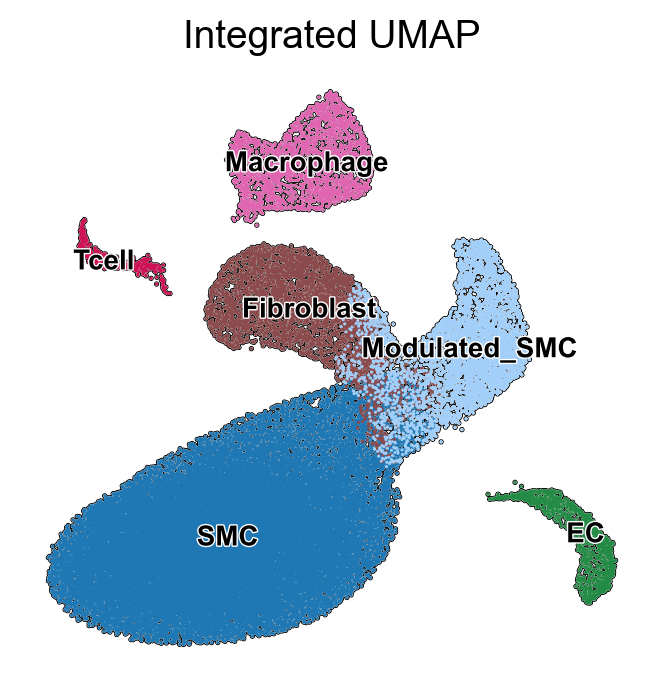

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

# with plt.rc_context({'axes.facecolor':'white','figure.figsize': [4, 4]}):
sc.pl.umap(adata, color=['celltype_level1'], size=5,
             alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
           cmap="Purples",
           legend_loc="on data",
           ax=ax,
           palette= color_dist,
           frameon=False,
           title='Integrated UMAP',
          show=True,save="fig1c.svg")


/home/hemingmin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/hemingmin/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


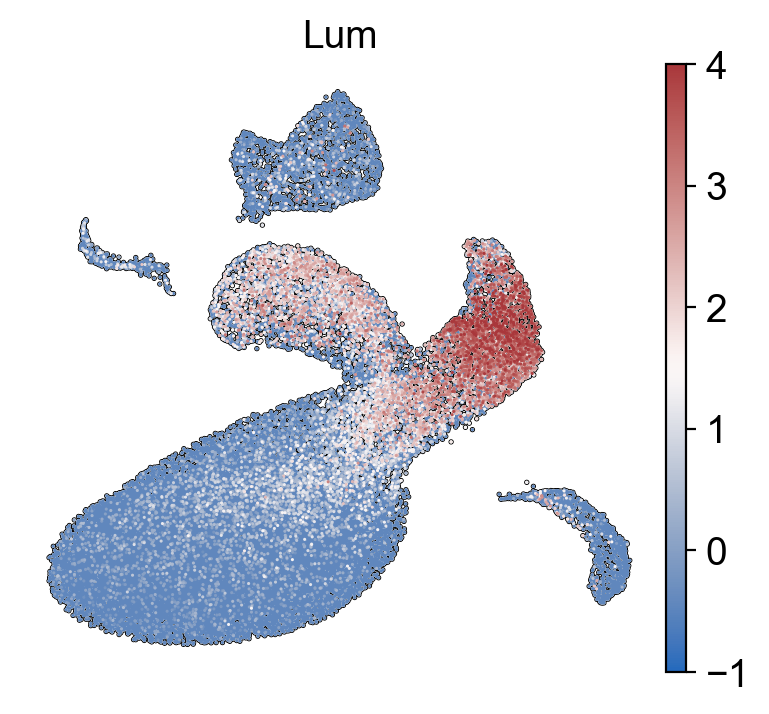

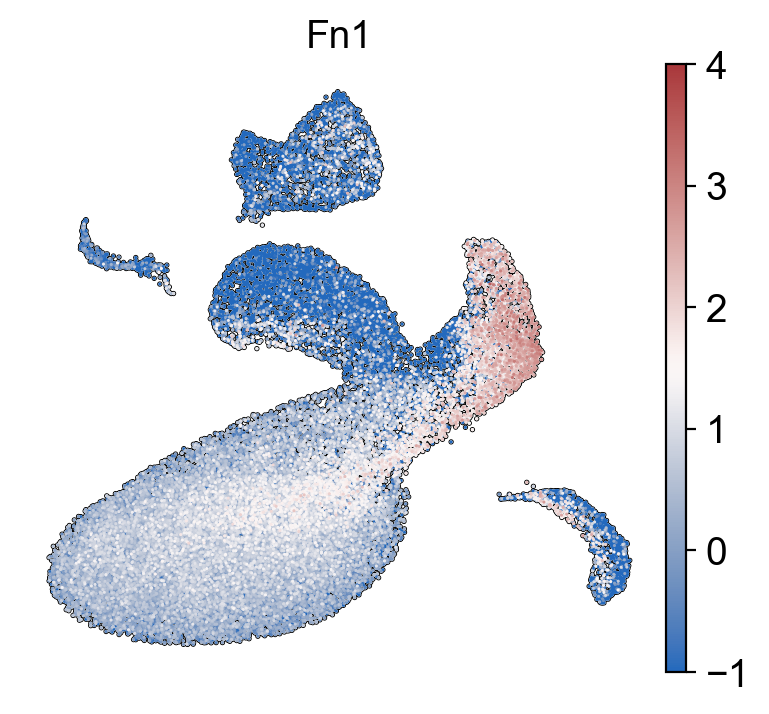

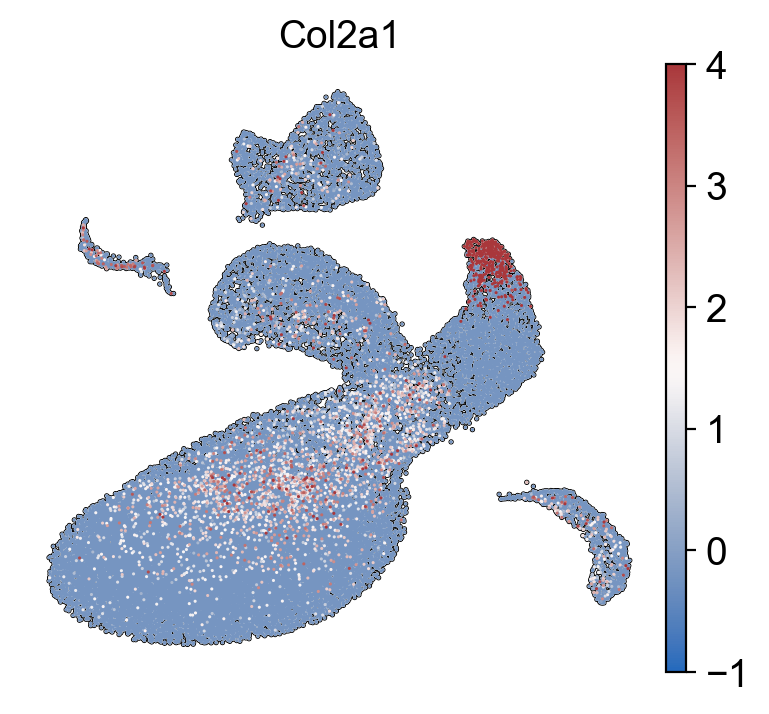

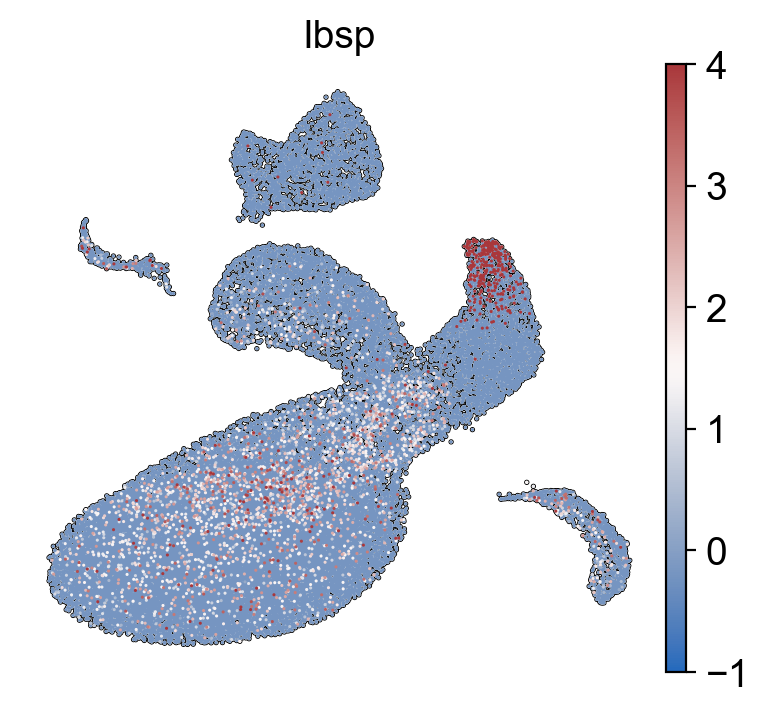

In [10]:
genes=['Lum','Fn1',"Col2a1","Ibsp"]
for j in genes:
    fig, ax = plt.subplots(figsize=(4.5, 4))
    sc.pl.umap(adata, color=j, size=5,
                 alpha=1, add_outline=True,
               layer="rna_scale_data",
               vmax=4,vmin=-1,
               ax=ax,
                legend_loc='upper right', legend_fontsize=10, legend_fontoutline=1,
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title=j,
              show=True,save=j+"fig1d_msmc.svg")

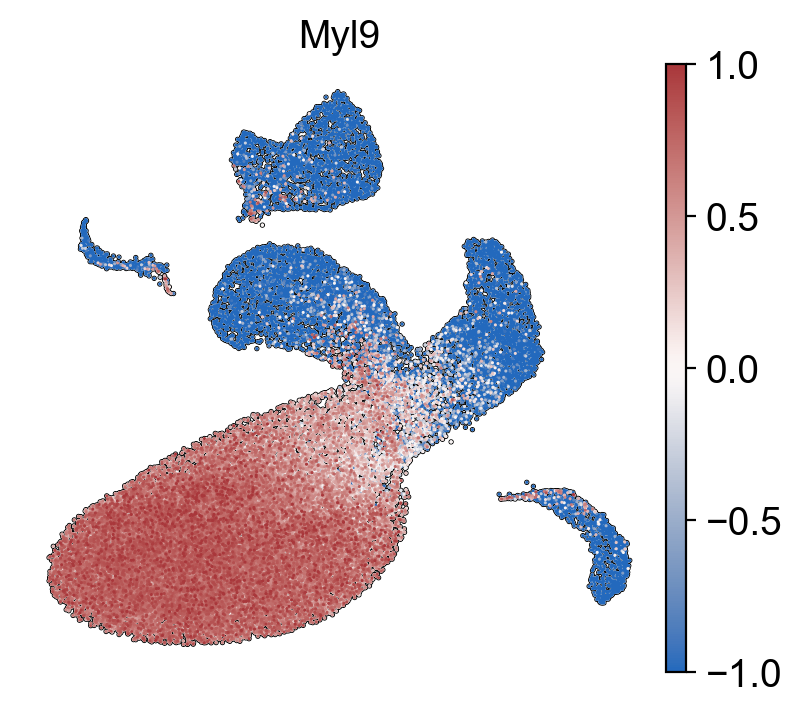

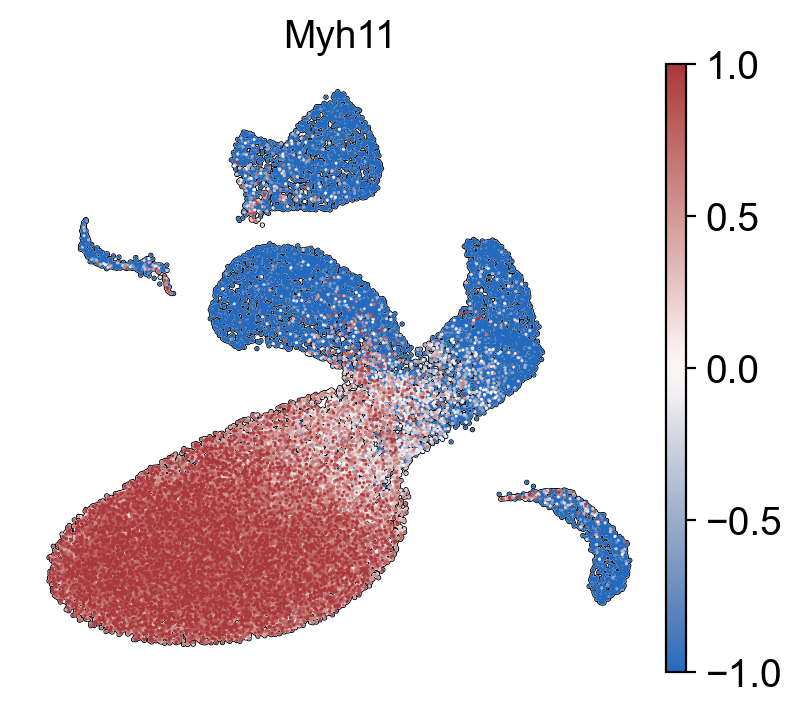

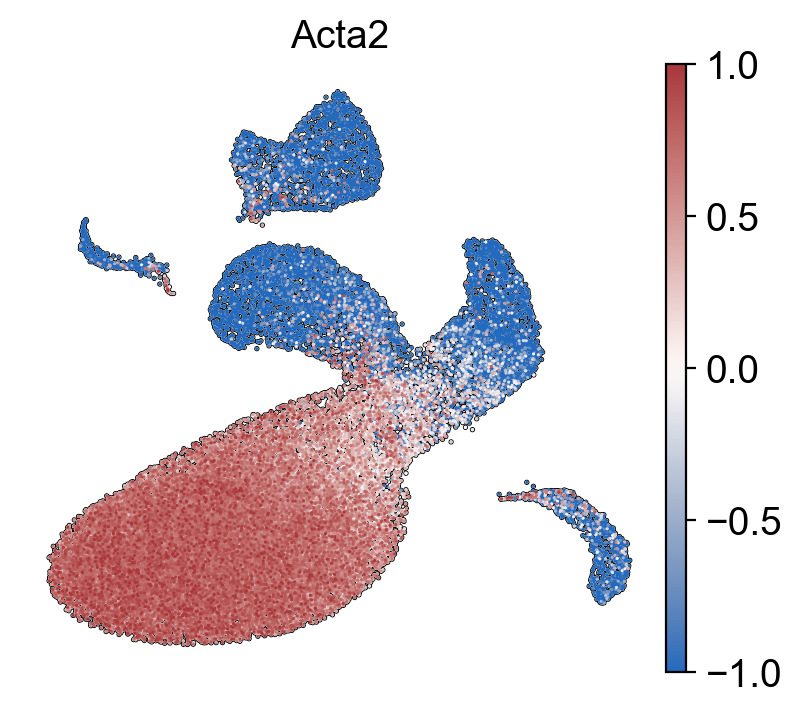

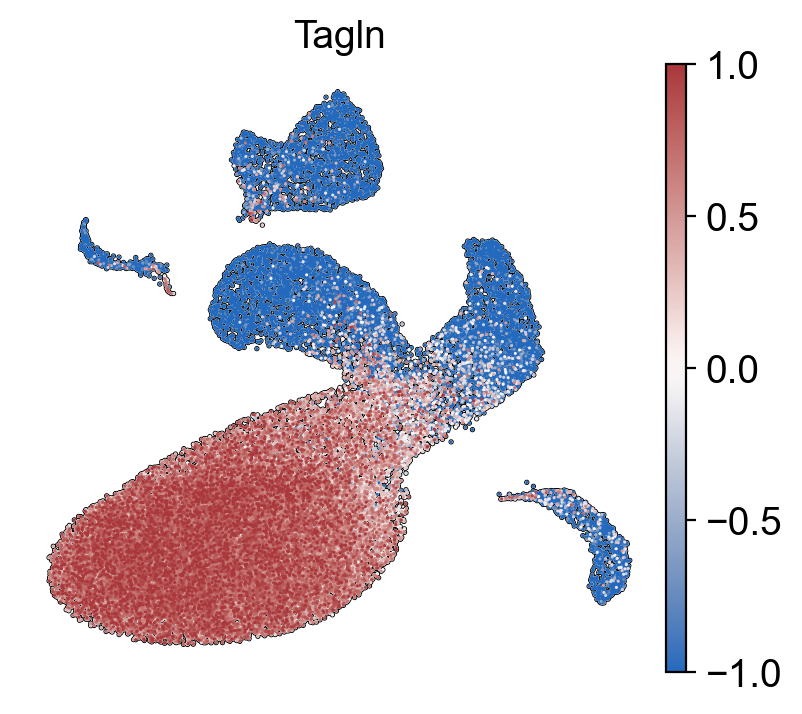

In [11]:
genes=['Myl9','Myh11','Acta2','Tagln']
for j in genes:
    fig, ax = plt.subplots(figsize=(4.5, 4))
    sc.pl.umap(adata, color=j, size=5,
                 alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
               layer="rna_scale_data",
               vmax=1,vmin=-1,
               ax=ax,
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title=j,
              show=True,save=j+"fig1d_smc.svg")

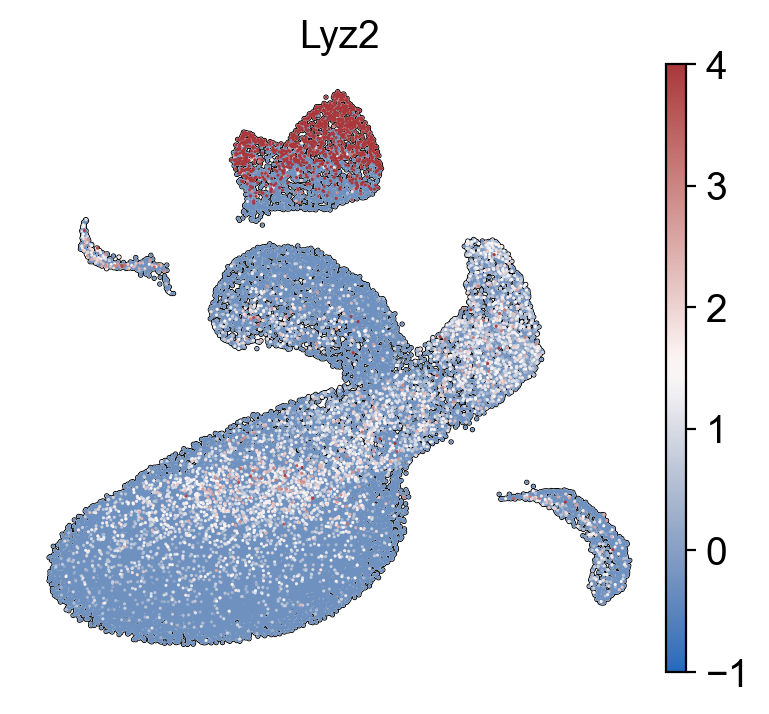

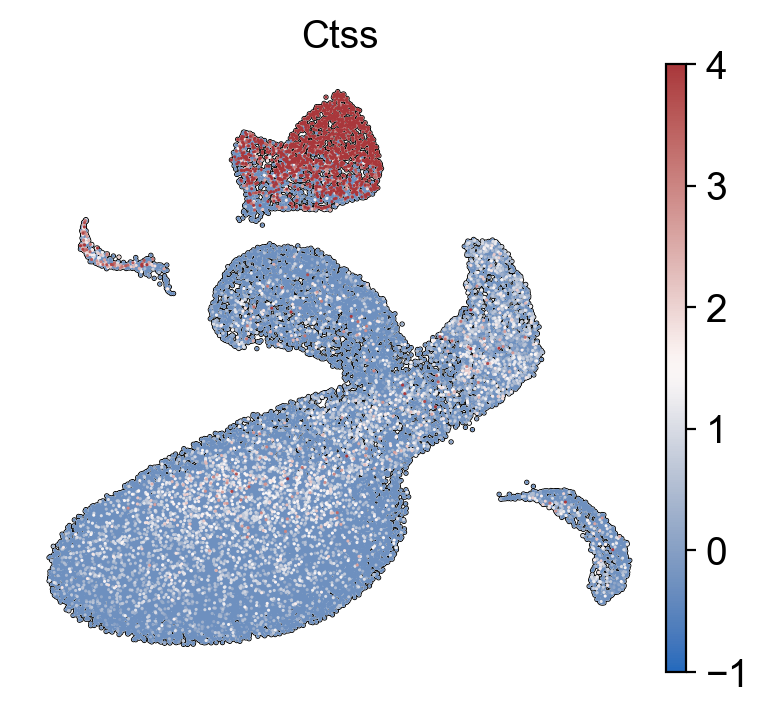

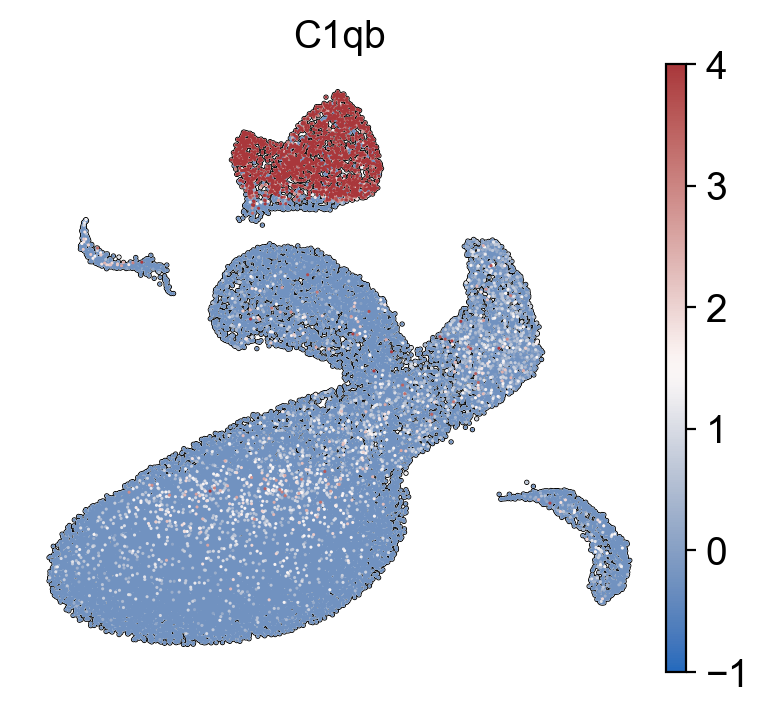

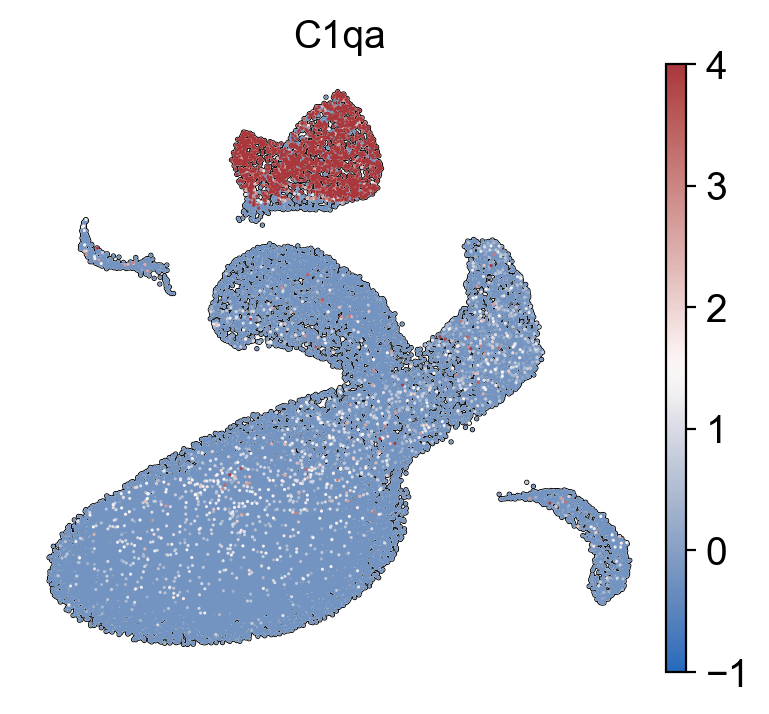

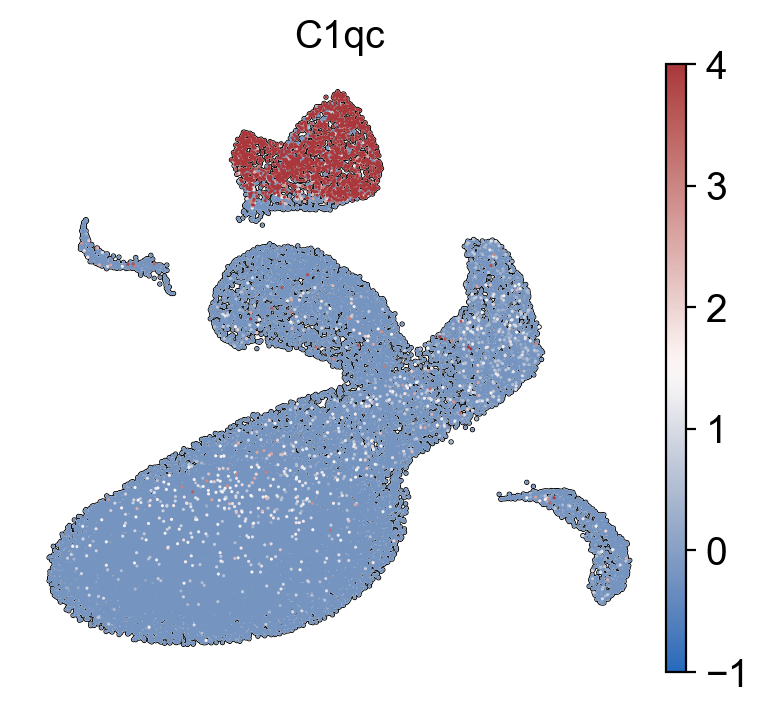

In [12]:
genes=['Lyz2','Ctss','C1qb','C1qa','C1qc']
for j in genes:
    fig, ax = plt.subplots(figsize=(4.5, 4))
    sc.pl.umap(adata, color=j, size=5,
                 alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
               layer="rna_scale_data",
               vmax=4,vmin=-1,
               ax=ax,
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title=j,
              show=True,save=j+"fig1d_macro.svg")

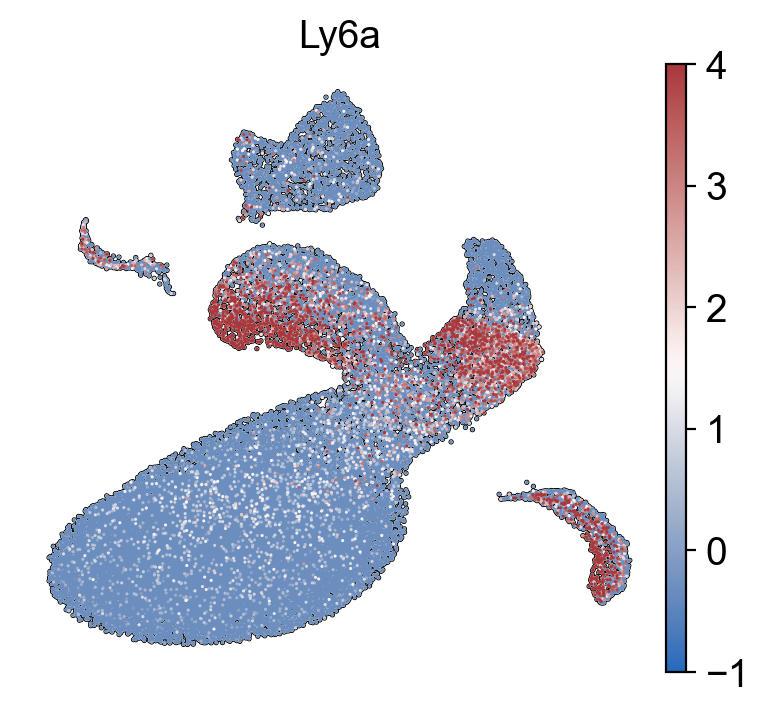

In [16]:
genes=['Ly6a']
for j in genes:
    fig, ax = plt.subplots(figsize=(4.5, 4))
    sc.pl.umap(adata, color=j, size=5,
                 alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
               layer="rna_scale_data",
               vmax=4,vmin=-1,
               ax=ax,
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title=j,
              show=True,save=j+"fig1d_msmc.svg")

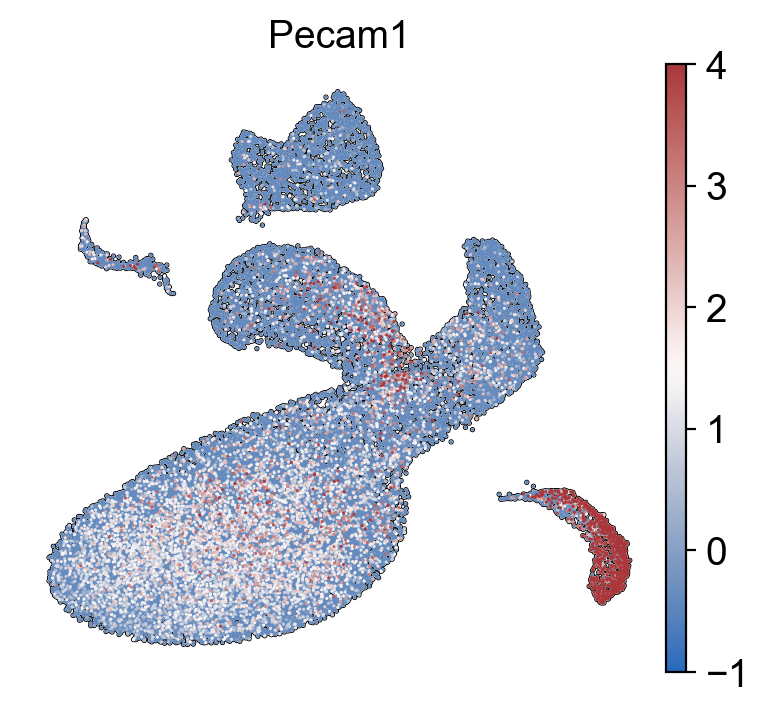

In [17]:
genes=['Pecam1']
for j in genes:
    fig, ax = plt.subplots(figsize=(4.5, 4))
    sc.pl.umap(adata, color=j, size=5,
                 alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
               layer="rna_scale_data",
               vmax=4,vmin=-1,
               ax=ax,
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title=j,
              show=True,save=j+"fig1d_EC.svg")

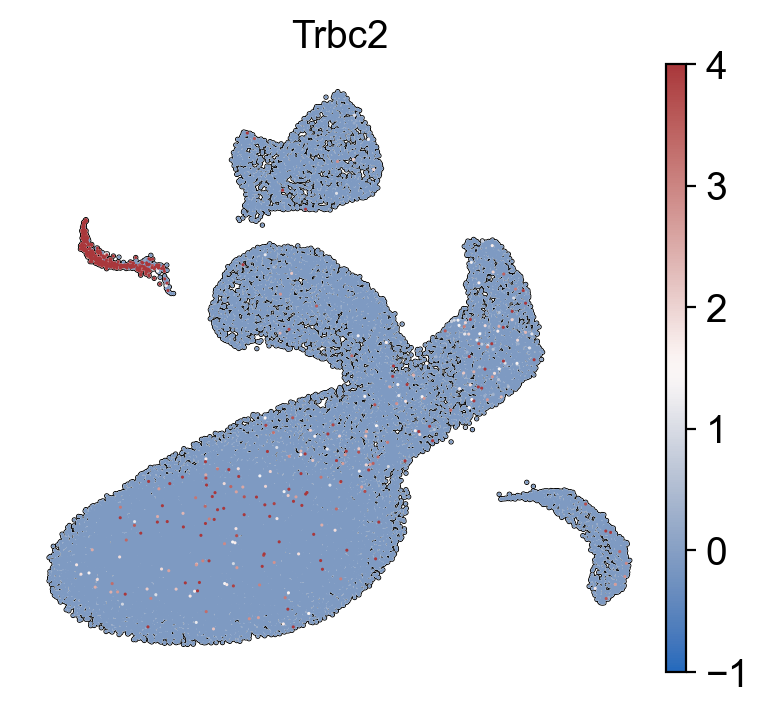

In [18]:
genes=['Trbc2']
for j in genes:
    fig, ax = plt.subplots(figsize=(4.5, 4))
    sc.pl.umap(adata, color=j, size=5,
                 alpha=1, add_outline=True,legend_fontsize=10, legend_fontoutline=1, 
               layer="rna_scale_data",
               vmax=4,vmin=-1,
               ax=ax,
               color_map= sns.color_palette("vlag", as_cmap=True),
               frameon=False,title=j,
              show=True,save=j+"fig1d_Tcell.svg")